In [4]:
import os
import json

import numpy as np 

import matplotlib as mpl
import matplotlib.pyplot as plt
# import scienceplots
# plt.style.use(['science', 'grid'])
# mpl.rcParams["font.size"] = "16"

In [5]:
with open('./data/evaluation.json', 'r') as f:
    results = json.loads(f.read())
    
models = results.keys()

In [6]:
models

dict_keys(['default_1', 'default_5', 'rebased_none_1', 'rebased_none_5', 'rebased_inp_1', 'rebased_inp_5', 'rebased_ker_1', 'rebased_ker_5'])

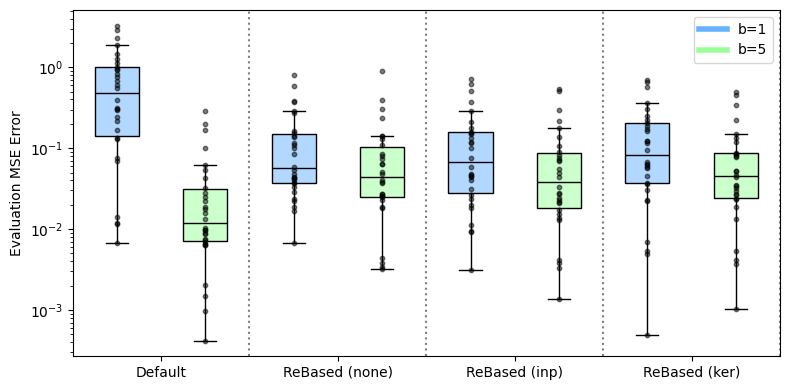

In [14]:
# Prepare data for boxplot
boxplot_data = []
labels = []

models = ['default', 'rebased_none', 'rebased_inp', 'rebased_ker'][::-1]
bs = [1, 5][::-1]

for model in models:
    for b in bs:
        key = f"{model}_{b}"
        boxplot_data.append(results[key])
        labels.append(key)
boxplot_data = boxplot_data[::-1]

# Create the boxplot
plt.figure(figsize=(8, 4))
box = plt.boxplot(boxplot_data, patch_artist=True, notch=False, vert=True, zorder=1, showfliers=False)

# Define colors for the boxplots
colors = ['#99FF99', '#66B3FF'][::-1]
for i, patch in enumerate(box['boxes']):
    model_index = i // len(bs)  # Determine the model index
    # patch.set_alpha(0.5)
    patch.set_edgecolor('black')
    patch.set_facecolor(colors[i % len(colors)])  # Set color based on hyperparameter
    
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.5))
    
    data = boxplot_data[i]
    y = np.random.normal(i + 1, 0.0, size=len(data))
    plt.scatter(y, data, alpha = 0.5, color = 'black', s = 10, zorder = 2)
    
for median in box['medians']:
    median.set_color('black')

# Adding legend
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(bs))]#[::-1]
labels_legend = [f'b={b}' for b in [1, 5, 10, 15]]
plt.legend(handles, labels_legend, loc='upper right', ncol=1)

# Set x-ticks and labels
plt.xticks(
    [1.5 + 2 * i for i in range(0, len(models))], 
    ['Default', 'ReBased (none)', 'ReBased (inp)', 'ReBased (ker)'], rotation = 0)
plt.ylabel('Evaluation MSE Error')
plt.grid(False, axis='x')

plt.axvline(2.5, 0, alpha = 0.5, color = 'black', linestyle = ':')
plt.axvline(4.5, 0, alpha = 0.5, color = 'black', linestyle = ':')
plt.axvline(6.5, 0, alpha = 0.5, color = 'black', linestyle = ':')
plt.axvline(8.5, 0, alpha = 0.5, color = 'black', linestyle = ':')

plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.savefig('./performance 1.svg')
plt.show()